In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


In [3]:
train_path = "data/daisee_train_features.csv"
test_path = "data/daisee_test_features.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


train_df.head()

Train shape: (2498, 28)
Test shape: (1723, 28)


,pitch_mean,pitch_std,pitch_min,pitch_max,pitch_p25,pitch_p50,pitch_p75,yaw_mean,yaw_std,yaw_min,...,ear_p25,ear_p50,ear_p75,blink_count,blink_rate,face_ratio,pitch_stability,yaw_stability,video,label
0,42.222206,14.446246,8.913239,81.889923,32.694828,40.590752,50.848209,7.440288,5.501600,-6.121628,...,20.157811,22.243468,23.854846,2,0.2,1.0,0.518458,0.816613,1100011002.avi,2
1,35.629902,15.766120,8.039581,82.505280,24.451344,32.410110,43.884304,6.367801,3.888348,-2.766998,...,23.313959,24.123692,25.138344,1,0.1,1.0,0.474463,0.870388,1100011003.avi,2
2,28.850217,14.212799,4.602554,65.722260,17.900021,26.060356,36.621082,6.612356,5.014183,-5.190475,...,24.151009,24.798837,25.796602,0,0.0,1.0,0.526240,0.832861,1100011004.avi,3
3,39.934956,13.633811,7.677399,73.377197,29.204819,37.003464,49.595165,5.817723,3.900338,-2.303894,...,23.040082,24.117469,25.191912,3,0.3,1.0,0.545540,0.869989,1100011005.avi,3
4,45.469291,18.329467,8.964569,94.242432,33.617916,43.274864,55.095947,6.901747,5.141146,-4.450073,...,20.091704,21.579188,22.522977,6,0.6,1.0,0.389018,0.828628,1100011006.avi,3


In [ ]:
def preprocess(df):
    print(f"Before cleaning: {df.shape}")
    

    df = df.drop_duplicates()
    
    df = df.dropna()  

    for col in df.select_dtypes('object').columns:
        df[col] = df[col].astype('category').cat.codes
        
    print(f"After cleaning: {df.shape}")
    return df

train_clean = preprocess(train_df)
test_clean = preprocess(test_df)

Before cleaning: (2498, 28)
After cleaning: (2498, 28)
Before cleaning: (1723, 28)
After cleaning: (1723, 28)


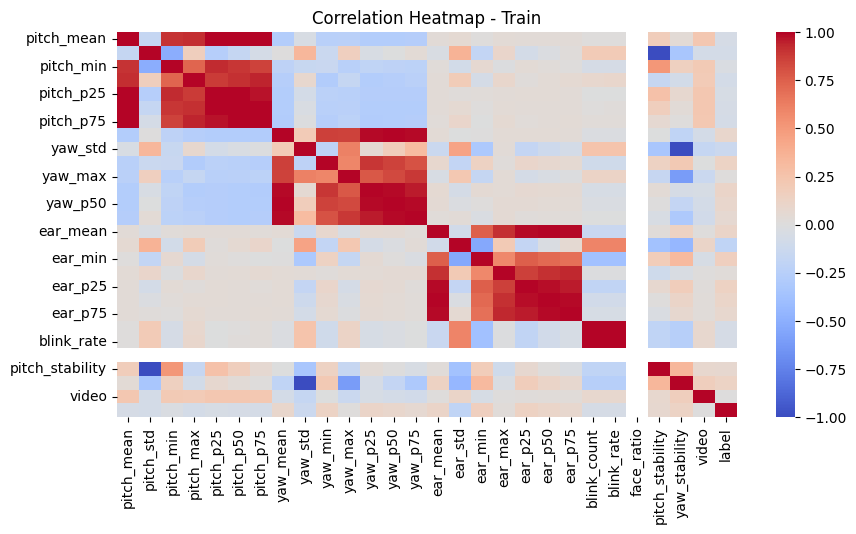

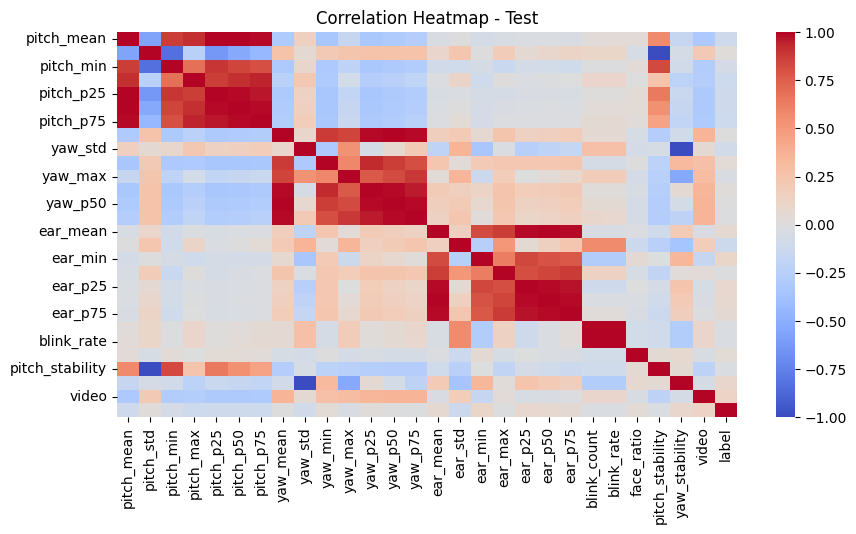

In [7]:
def visualize_dataset(df, title="Dataset"):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
    plt.title(f"Correlation Heatmap - {title}")
    plt.show()
    
    if 'target' in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x='target', data=df)
        plt.title(f"Class Distribution - {title}")
        plt.show()

visualize_dataset(train_clean, "Train")
visualize_dataset(test_clean, "Test")

No target column in Train
No target column in Test
